<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**DEAP_GE code running regression problems**

In [1]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Clone this repository in which we have all functions and classes created or adapted to this work.

In [3]:
!git clone https://github.com/danozu/deap_ge.git

Cloning into 'deap_ge'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 34 (delta 12), reused 29 (delta 7), pack-reused 0
Unpacking objects: 100% (34/34), done.


In [4]:
!pwd

%cd /content/deap_ge

/content
/content/deap_ge


Import adapted functions and classes from PonyGE2.

Import our algorithms, adapted from deap.algorithms.

Import DEAP (maybe it can be necessary to run the installation before that).

Import functions used by our grammars.



In [5]:
!pip install deap

from ponyge2_adapted_files import Grammar, ge
from functions import pdiv, plog, psqrt
import algorithms

from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from deap import creator, base, tools

     |████████████████████████████████| 160 kB 5.2 MB/s 


Set our Grammatical Evolution parameters.

In [7]:
POPULATION_SIZE = 2000
MAX_GENERATIONS = 50
P_CROSSOVER = 0.8
P_MUTATION = 0.01
ELITE_SIZE = round(0.01*POPULATION_SIZE)

HALL_OF_FAME_SIZE = 1
MAX_INIT_TREE_DEPTH = 10
MIN_INIT_TREE_DEPTH = 1
MAX_TREE_DEPTH = 17
MAX_WRAPS = 0
CODON_SIZE = 255

Set a regression problem to solve. For now, we can choose  only 'pagie1'.

In [8]:
problem = 'pagie1'

Read datasets and grammars according to the problem picked in the previous cell.

In [9]:
if problem == 'pagie1':
    X_train = np.zeros([2,676], dtype=float)
    Y_train = np.zeros([676,], dtype=float)

    data_train = pd.read_table(r"datasets/Pagie1_train.txt")
    for i in range(2):
        for j in range(676):
            X_train[i,j] = data_train['x'+ str(i)].iloc[j]
    for i in range(676):
        Y_train[i] = data_train['response'].iloc[i]

    X_test = np.zeros([2,10000], dtype=float)
    Y_test = np.zeros([10000,], dtype=float)

    data_test = pd.read_table(r"datasets/Pagie1_test.txt")
    for i in range(2):
        for j in range(10000):
            X_test[i,j] = data_test['x'+ str(i)].iloc[j]
    for i in range(10000):
        Y_test[i] = data_test['response'].iloc[i]

    GRAMMAR_FILE = 'Pagie1.bnf'

#Pagie-1 function

#$\frac{1}{1 + x_1^{-4}} + \frac{1}{1 + x_2^{-4}}$

##Training set: E[−5, 5, 0.4]

##Test set: E[−5, 5, 0.1]

Print train data.

In [10]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 10000)
pd.set_option('display.colheader_justify', 'center')

display(data_train)

,x0,x1,response
0,-5.0,-5.0,1.996805
1,-5.0,-4.6,1.996174
2,-5.0,-4.2,1.995199
3,-5.0,-3.8,1.993630
4,-5.0,-3.4,1.990975
5,-5.0,-3.0,1.986207
6,-5.0,-2.6,1.976988
7,-5.0,-2.2,1.957462
8,-5.0,-1.8,1.911428
9,-5.0,-1.4,1.791859


Print test data.

In [11]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 10000)
pd.set_option('display.colheader_justify', 'center')

display(data_test)

,x0,x1,response
0,-5.0,-5.0,1.996805
1,-5.0,-4.9,1.996671
2,-5.0,-4.8,1.996522
3,-5.0,-4.7,1.996357
4,-5.0,-4.6,1.996174
5,-5.0,-4.5,1.995970
6,-5.0,-4.4,1.995742
7,-5.0,-4.3,1.995486
8,-5.0,-4.2,1.995199
9,-5.0,-4.1,1.994876


Print grammar.

In [12]:
f = open("grammars/" + GRAMMAR_FILE, "r")
print(f.read())
f.close() 

<e>  ::=  <e>+<e>|
          <e>-<e>|
          <e>*<e>|
          pdiv(<e>,<e>)|
          psqrt(<e>)|
          np.sin(<e>)|
          np.tanh(<e>)|
          np.exp(<e>)|
          plog(<e>)|
          x[0]|x[1]|
          <c><c>.<c><c>
<c>  ::= 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9




Set up the grammar addressed by GRAMMAR_FILE in the class Grammar.

In [13]:
BNF_GRAMMAR = Grammar(path.join("grammars", GRAMMAR_FILE))

Define as fitness function the number of outputs wrongly predicted.

In [14]:
def fitness_eval(individual, points):
    #points = [X, Y]
    x = points[0]
    y = points[1]
    
    if individual.invalid == True:
        return np.NaN,

    try:
        pred = eval(individual.phenotype)
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError):
        return np.NaN,
    assert np.isrealobj(pred)
    
    try:
        fitness = np.mean(np.square(y - pred))
    
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError):
        fitness = np.NaN
    
    return fitness,

Create the deap toolbox.

Use negative weights in the `base.Fitness` since we are trying to minimise the fitness.

`ge.Individual` is a class with the following attributes: `phenotype`, `genome`, `tree`, `nodes`, `invalid` (True or False), `depth` and `used_codons`.

Usually, when using deap, we initialise each individual independently, and then we repeat that until we fill out the whole population. However, since we are using Position Independent Grow Initialisation, we need to initialise all individuals simultaneously.

`ge.selTournament` prevents selecting invalid individuals.

`ge.crossover_onepoint` selects crossover points within the used portion of the genome. 

Similarly, `ge.mutation_int_flip_per_codon` performs only over the effective length.



In [15]:
toolbox = base.Toolbox()

# define a single objective, minimising fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

creator.create('Individual', ge.Individual, fitness=creator.FitnessMin)

toolbox.register("populationCreator", ge.initialisation_PI_Grow, creator.Individual) 

toolbox.register("evaluate", fitness_eval, points=[X_train, Y_train])

# Tournament selection:
toolbox.register("select", ge.selTournament, tournsize=7)

# Single-point crossover:
toolbox.register("mate", ge.crossover_onepoint)

# Flip-int mutation:
toolbox.register("mutate", ge.mutation_int_flip_per_codon)


Set the main function and run it.

Set the statistics object regarding the fitness score, but there are other statistics defined internally.

Perform Grammatical Evolution using `algorithms.ge_eaSimple`, a simple evolutionary algorithm. The differences to the `algorithms.eaSimple` used by deap are:

*   We use elitism;
*   After crossover and mutation, we check the offspring to assure that the max tree depth is not achieved;
*   We measure the generation and the selection times;
*   We count the number of invalid individuals.

In [16]:
# create initial population (generation 0):
population = toolbox.populationCreator(size=POPULATION_SIZE, 
                                        bnf_grammar=BNF_GRAMMAR, 
                                        min_init_tree_depth=MIN_INIT_TREE_DEPTH,
                                        max_init_tree_depth=MAX_INIT_TREE_DEPTH,
                                        max_tree_depth=MAX_TREE_DEPTH, 
                                        max_wraps=MAX_WRAPS,
                                        codon_size=CODON_SIZE
                                        )

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# prepare the statistics object:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.nanmean)
stats.register("std", np.nanstd)
stats.register("min", np.nanmin)
stats.register("max", np.nanmax)

# perform the Grammatical Evolution flow:
population, logbook = algorithms.ge_eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS, elite_size=ELITE_SIZE,
                                          bnf_grammar=BNF_GRAMMAR, codon_size=CODON_SIZE, 
                                          max_tree_depth=MAX_TREE_DEPTH, max_wraps=MAX_WRAPS,
                                          stats=stats, halloffame=hof, verbose=True)

gen	invalid	avg	std	min      	max	selection_time	generation_time
0  	0      	inf	nan	0.0337724	inf	0             	0.38369        
1  	0      	inf	nan	0.0337724	inf	0.0314326     	1.98438        
2  	638    	inf	nan	0.0337724	inf	0.0325587     	0.394466       
3  	234    	5.26887e+51	1.12574e+53	0.0337724	2.41051e+54	0.041471      	0.365863       
4  	169    	152217     	6.59778e+06	0.0337724	2.86225e+08	0.0283923     	0.350949       
5  	117    	7.64434e+20	3.32243e+22	0.0337724	1.44478e+24	0.0457923     	0.392513       
6  	110    	591081     	1.29934e+07	0.0337724	2.86225e+08	0.0334387     	0.856241       
7  	62     	inf        	nan        	0.0337724	inf        	0.0331285     	0.324989       
8  	60     	3.12752    	89.2858    	0.0337724	3727.44    	0.0305226     	0.322825       
9  	61     	10.2455    	182.306    	0.0337724	4433.97    	0.0298483     	0.350802       
10 	75     	inf        	nan        	0.0337724	inf        	0.0323367     	0.362014       
11 	79     	3.00924e+48	1.31

Show the results in a properly way.

In [17]:
max_fitness_values, mean_fitness_values = logbook.select("max", "avg")
min_fitness_values, std_fitness_values = logbook.select("min", "std")
selection_time = logbook.select("selection_time")
generation_time = logbook.select("generation_time")
gen, invalid = logbook.select("gen", "invalid")

header = ['gen', 'invalid', 'avg', 'std', 'min', 'max', 'selection_time', 'generation_time']

results = pd.DataFrame(list(zip(gen, invalid, mean_fitness_values, std_fitness_values, min_fitness_values, max_fitness_values, selection_time, generation_time)),
               columns = header)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 10000)
pd.set_option('display.colheader_justify', 'center')

display(results)

,gen,invalid,avg,std,min,max,selection_time,generation_time
0,0,0,inf,NaN,0.033772,inf,0.000000,0.383690
1,1,0,inf,NaN,0.033772,inf,0.031433,1.984384
2,2,638,inf,NaN,0.033772,inf,0.032559,0.394466
3,3,234,5.268870e+51,1.125739e+53,0.033772,2.410508e+54,0.041471,0.365863
4,4,169,1.522173e+05,6.597784e+06,0.033772,2.862253e+08,0.028392,0.350949
5,5,117,7.644344e+20,3.322433e+22,0.033772,1.444781e+24,0.045792,0.392513
6,6,110,5.910814e+05,1.299344e+07,0.033772,2.862253e+08,0.033439,0.856241
7,7,62,inf,NaN,0.033772,inf,0.033128,0.324989
8,8,60,3.127517e+00,8.928577e+01,0.033772,3.727442e+03,0.030523,0.322825
9,9,61,1.024553e+01,1.823056e+02,0.033772,4.433965e+03,0.029848,0.350802


Show the best individual as an expression and other statistics values.

In [18]:
print("Best individual: ")
print(hof.items[0].phenotype)
print()
print("Training Fitness: ", hof.items[0].fitness.values[0])
print()
print("Test Fitness: ", fitness_eval(hof.items[0], [X_test,Y_test])[0])
print()
print("Depth: ", hof.items[0].depth)
print()
print("Length of the genome: ", len(hof.items[0].genome))
print()
print(f'Used portion of the genome: {hof.items[0].used_codons/len(hof.items[0].genome):.2f}')
print()


Best individual: 
psqrt(plog(x[0]*x[1]*psqrt(psqrt(x[1]*psqrt(01.95)-psqrt(x[0]*14.89*x[0]*np.sin(x[0]*np.sin(x[0])))*x[1])*psqrt(12.04+x[0]*np.sin(x[0])))))

Training Fitness:  0.01701049194773162

Test Fitness:  0.020754629798877038

Depth:  17

Length of the genome:  223

Used portion of the genome: 0.21



Extract statistics to plot graphs regarding the best fitness and the average fitness.

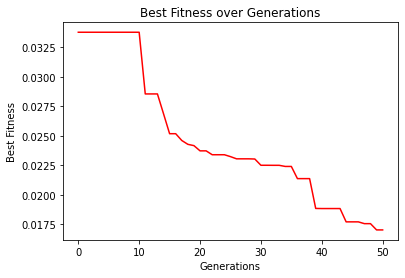

In [19]:
# Extract statistics to plot graphs:
min_fitness_values = logbook.select("min")
mean_fitness_values = logbook.select("avg")
std_fitness_values = logbook.select("std")

plt.plot(min_fitness_values, color='red')
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.title('Best Fitness over Generations')
plt.show()


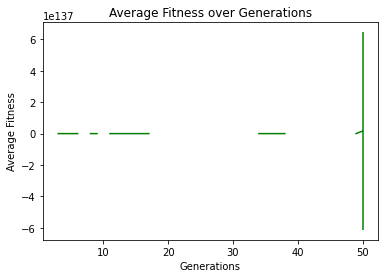

In [20]:
gen = np.arange(0, 50+1)

plt.xlabel('Generations')
plt.ylabel('Average Fitness')
plt.title('Average Fitness over Generations')
plt.errorbar(gen, mean_fitness_values, yerr=std_fitness_values,label="Best", color="Green")
plt.show()